In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime
import pandas_datareader as pdr
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
start = datetime(2012, 12, 1)
end = datetime(2022, 12, 1)

df_aapl = pdr.get_data_yahoo('AAPL', start, end)

In [3]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-03,21.235357,20.910713,21.201786,20.935356,3.642800e+08,18.004150
2012-12-04,20.778570,20.433214,20.778570,20.566071,5.570684e+08,17.686573
2012-12-05,20.330357,19.241785,20.318214,19.242500,1.044638e+09,16.548319
2012-12-06,19.761070,18.522499,18.890715,19.544287,1.177212e+09,16.807850
2012-12-07,19.828571,18.928572,19.764286,19.044643,7.870408e+08,16.378160


In [5]:
df_aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111380900.0,148.029999
2022-12-01,149.130005,146.610001,148.210007,148.309998,71250400.0,148.309998


In [6]:
df_aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2518.0,6.213104e+01,4.898945e+01,1.427143e+01,2.694875e+01,4.087500e+01,8.192313e+01,1.829400e+02
Low,2518.0,6.076726e+01,4.773650e+01,1.375357e+01,2.646188e+01,3.997750e+01,8.078375e+01,1.791200e+02
Open,2518.0,6.143649e+01,4.835223e+01,1.385607e+01,2.675375e+01,4.035000e+01,8.115188e+01,1.826300e+02
Close,2518.0,6.147654e+01,4.839191e+01,1.394750e+01,2.670500e+01,4.037125e+01,8.167563e+01,1.820100e+02
Volume,2518.0,1.755352e+08,1.324419e+08,3.519590e+07,9.286760e+07,1.312634e+08,2.085935e+08,1.460852e+09
Adj Close,2518.0,5.967584e+01,4.891822e+01,1.206458e+01,2.449096e+01,3.826690e+01,8.025416e+01,1.809597e+02


In [7]:
#check any na in the data

df_aapl.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
#check if dtype is datetime
df_aapl.index

DatetimeIndex(['2012-12-03', '2012-12-04', '2012-12-05', '2012-12-06',
               '2012-12-07', '2012-12-10', '2012-12-11', '2012-12-12',
               '2012-12-13', '2012-12-14',
               ...
               '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-25', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

In [9]:
#check Dtype
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2012-12-03 to 2022-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2518 non-null   float64
 1   Low        2518 non-null   float64
 2   Open       2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Volume     2518 non-null   float64
 5   Adj Close  2518 non-null   float64
dtypes: float64(6)
memory usage: 137.7 KB


## ARIMA

In [10]:
model_auto = auto_arima(df_aapl['Adj Close'])
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4686.277
Date:                Sun, 08 Jan 2023   AIC                           9380.554
Time:                        14:07:39   BIC                           9403.877
Sample:                             0   HQIC                          9389.019
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0323      0.020      1.639      0.101      -0.006       0.071
ar.L1          0.3755      0.121      3.115      0.002       0.139       0.612
ma.L1         -0.4416      0.118     -3.745      0.000      -0.673      -0.211
sigma2         2.4249      0.028     85.549      0.000       2.369       2.480
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10515.69
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              54.70   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
train = df_aapl[:len(df_aapl) - 30]
test = df_aapl[len(df_aapl) - 30:]
print(train.shape, test.shape)

(2488, 6) (30, 6)


In [74]:
model_arima = ARIMA(train['Adj Close'], order=(1, 1, 1))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2488
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4533.419
Date:                Sun, 08 Jan 2023   AIC                           9072.838
Time:                        15:41:25   BIC                           9090.295
Sample:                             0   HQIC                          9079.178
                               - 2488                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2854      0.140      2.040      0.041       0.011       0.560
ma.L1         -0.3462      0.138     -2.512      0.012      -0.616      -0.076
sigma2         2.2428      0.027     83.643      0.000       2.190       2.295
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9250.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              51.12   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_arima.predict(start=start, end=end, typ='levels')
pred.index = df_aapl.index[start:end+1]
print(pred)

Date
2022-10-20    143.565604
2022-10-21    143.549577
2022-10-24    143.545003
2022-10-25    143.543697
2022-10-26    143.543324
2022-10-27    143.543218
2022-10-28    143.543187
2022-10-31    143.543179
2022-11-01    143.543176
2022-11-02    143.543176
2022-11-03    143.543175
2022-11-04    143.543175
2022-11-07    143.543175
2022-11-08    143.543175
2022-11-09    143.543175
2022-11-10    143.543175
2022-11-11    143.543175
2022-11-14    143.543175
2022-11-15    143.543175
2022-11-16    143.543175
2022-11-17    143.543175
2022-11-18    143.543175
2022-11-21    143.543175
2022-11-22    143.543175
2022-11-23    143.543175
2022-11-25    143.543175
2022-11-28    143.543175
2022-11-29    143.543175
2022-11-30    143.543175
2022-12-01    143.543175
Name: predicted_mean, dtype: float64


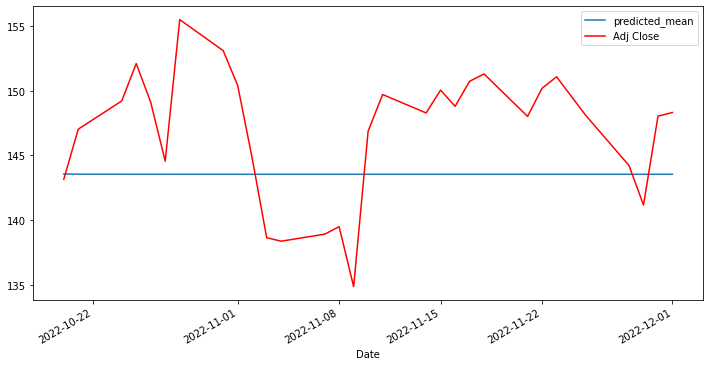

In [76]:
plt.figure(figsize=(12,6))
pred.plot(legend=True)
test['Adj Close'].plot(legend=True, c='r')
plt.legend()

In [77]:
rmse = math.sqrt(mean_squared_error(pred, test['Adj Close']))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 5.882330063413914.


In [78]:
model2 = ARIMA(df_aapl['Adj Close'], order=(1,1,1))
model2 = model2.fit()
df_aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111380900.0,148.029999
2022-12-01,149.130005,146.610001,148.210007,148.309998,71250400.0,148.309998


In [79]:
index_future_dates = pd.date_range(start='2022-12-01', end='2022-12-31')
pred_f = model2.predict(start=len(df_aapl), end=len(df_aapl)+30, types='levels')
pred_f.index= index_future_dates
print(pred_f)

2022-12-01    148.163192
2022-12-02    148.110234
2022-12-03    148.091129
2022-12-04    148.084237
2022-12-05    148.081751
2022-12-06    148.080854
2022-12-07    148.080531
2022-12-08    148.080414
2022-12-09    148.080372
2022-12-10    148.080357
2022-12-11    148.080351
2022-12-12    148.080349
2022-12-13    148.080348
2022-12-14    148.080348
2022-12-15    148.080348
2022-12-16    148.080348
2022-12-17    148.080348
2022-12-18    148.080348
2022-12-19    148.080348
2022-12-20    148.080348
2022-12-21    148.080348
2022-12-22    148.080348
2022-12-23    148.080348
2022-12-24    148.080348
2022-12-25    148.080348
2022-12-26    148.080348
2022-12-27    148.080348
2022-12-28    148.080348
2022-12-29    148.080348
2022-12-30    148.080348
2022-12-31    148.080348
Freq: D, Name: predicted_mean, dtype: float64


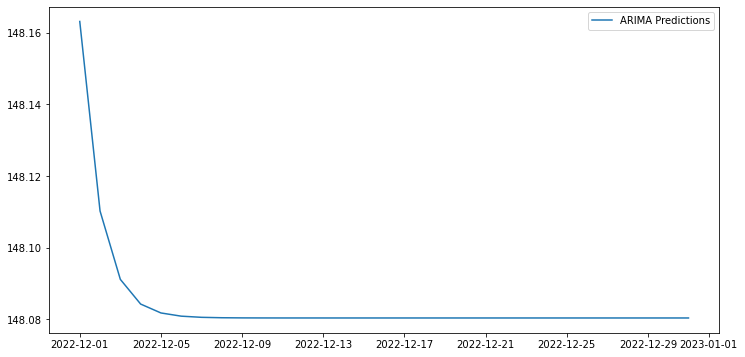

In [80]:
# pred_f.plot(legend='ARIMA Predictions')
# plt.plot(df_aapl['Adj Close'])
plt.figure(figsize=(12,6))
plt.plot(pred_f, label='ARIMA Predictions')
plt.legend()

# Prophet

In [42]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [43]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-03,21.235357,20.910713,21.201786,20.935356,3.642800e+08,18.004150
2012-12-04,20.778570,20.433214,20.778570,20.566071,5.570684e+08,17.686573
2012-12-05,20.330357,19.241785,20.318214,19.242500,1.044638e+09,16.548319
2012-12-06,19.761070,18.522499,18.890715,19.544287,1.177212e+09,16.807850
2012-12-07,19.828571,18.928572,19.764286,19.044643,7.870408e+08,16.378160


In [46]:
shape = df_aapl.shape[0]
df_prop = df_aapl[['Adj Close']]
df_prop.reset_index(inplace=True)
df_prop['Date'] = pd.to_datetime(df_prop.Date,format='%Y-%m-%d')
df_prop.index = df_prop['Date']
df_prop.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)
df_prop.head()

,ds,y
Date,,
2012-12-03,2012-12-03,18.004150
2012-12-04,2012-12-04,17.686573
2012-12-05,2012-12-05,16.548319
2012-12-06,2012-12-06,16.807850
2012-12-07,2012-12-07,16.378160


<AxesSubplot:xlabel='ds'>

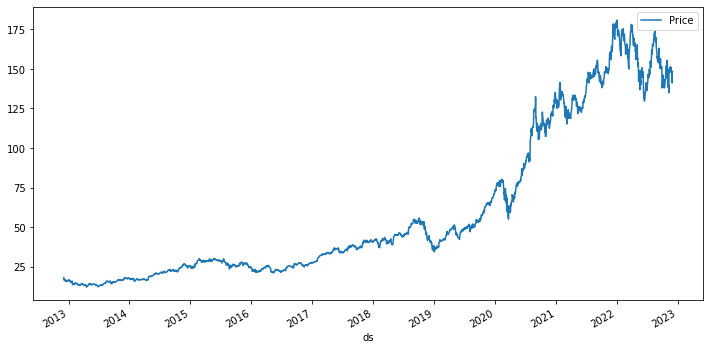

In [48]:
df_prop.plot(x='ds', y='y', figsize=(12,6), label='Price')


In [81]:

train = df_prop[:len(df_prop) - 30]
test = df_prop[len(df_prop) - 30:]
print(train.shape, test.shape)

(2488, 2) (30, 2)


In [82]:
model_p = Prophet()
model_p.fit(train)
pred_p = model_p.make_future_dataframe(periods=30)
pred_p = model_p.predict(pred_p)

15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:38 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
pred_p.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2513,2022-11-14,170.612476,162.560310,178.129934,170.612476,170.612476,-0.167270,-0.167270,-0.167270,-0.898088,-0.898088,-0.898088,0.730817,0.730817,0.730817,0.0,0.0,0.0,170.445206
2514,2022-11-15,170.677226,163.337448,178.211080,170.677226,170.677226,-0.163787,-0.163787,-0.163787,-0.890914,-0.890914,-0.890914,0.727128,0.727128,0.727128,0.0,0.0,0.0,170.513439
2515,2022-11-16,170.741975,162.645437,178.958569,170.741975,170.741975,-0.128688,-0.128688,-0.128688,-0.859291,-0.859291,-0.859291,0.730603,0.730603,0.730603,0.0,0.0,0.0,170.613288
2516,2022-11-17,170.806725,163.108004,177.843476,170.806725,170.806725,-0.187036,-0.187036,-0.187036,-0.929241,-0.929241,-0.929241,0.742205,0.742205,0.742205,0.0,0.0,0.0,170.619689
2517,2022-11-18,170.871474,162.387014,178.081895,170.871474,170.871474,-0.302036,-0.302036,-0.302036,-1.064702,-1.064702,-1.064702,0.762665,0.762665,0.762665,0.0,0.0,0.0,170.569438


In [84]:
plot_plotly(model_p, pred_p)

In [85]:
plot_components_plotly(model_p, pred_p)

In [88]:
predictions = pred_p.iloc[-30:]['yhat']

In [89]:
rmse_p = math.sqrt(mean_squared_error(predictions, test['y']))
print("The root mean squared error is {}.".format(rmse_p))

The root mean squared error is 24.05650389195776.
